In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1: Data Preparation and Exploration

In [2]:
df = pd.read_csv("C:\ExcelR\DS\Assignment\Timeseries\Timeseries\exchange_rate.csv",parse_dates=['date'], dayfirst=True)

In [3]:
df.head(10)

,date,Ex_rate
0,1990-01-01,0.7855
1,1990-01-02,0.7818
2,1990-01-03,0.7867
3,1990-01-04,0.7860
4,1990-01-05,0.7849
5,1990-01-06,0.7866
6,1990-01-07,0.7886
7,1990-01-08,0.7910
8,1990-01-09,0.7939
9,1990-01-10,0.7894


In [4]:
df.set_index('date', inplace=True)

In [5]:
df

,Ex_rate
date,
1990-01-01,0.785500
1990-01-02,0.781800
1990-01-03,0.786700
1990-01-04,0.786000
1990-01-05,0.784900
...,...
2010-10-06,0.718494
2010-10-07,0.721839
2010-10-08,0.723197


In [6]:
df.isna().sum()

Ex_rate    0
dtype: int64

In [7]:
df.duplicated().sum()

2258

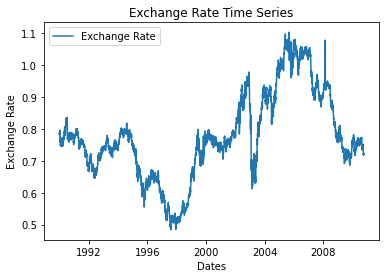

In [8]:
plt.plot(df['Ex_rate'], label='Exchange Rate')
plt.title('Exchange Rate Time Series')
plt.xlabel('Dates')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Part 2: Model Building - ARIMA

### Parameter Selection:

In [9]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

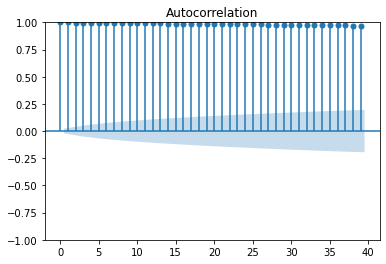

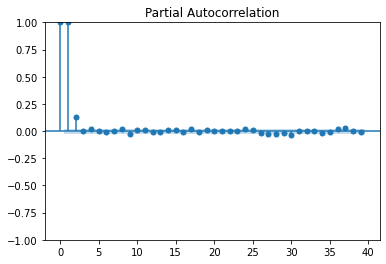

In [10]:
plot_acf(df['Ex_rate'])
plot_pacf(df['Ex_rate'])
plt.show()

### Model Fitting:

In [11]:
from statsmodels.tsa.arima.model import ARIMA

In [12]:
model = ARIMA(df['Ex_rate'], order=(1,1,1))
arima_result = model.fit()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [13]:
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Sun, 15 Sep 2024   AIC                         -56102.322
Time:                        13:03:54   BIC                         -56081.519
Sample:                    01-01-1990   HQIC                        -56095.182
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

### Diagnostics:

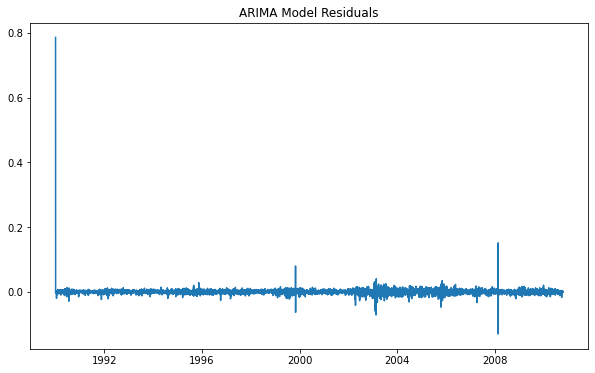

In [14]:
residuals = arima_result.resid
plt.figure(figsize=(10,6))
plt.plot(residuals)
plt.title('ARIMA Model Residuals')
plt.show()

### Forecasting:

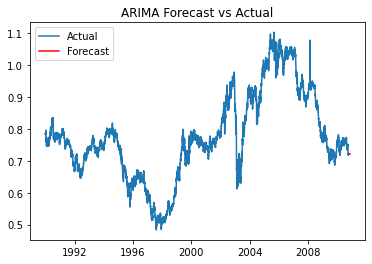

In [15]:
forecast = arima_result.forecast(steps=30)
plt.plot(df['Ex_rate'], label='Actual')
plt.plot(forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast vs Actual')
plt.legend()
plt.show()


# Part 3: Model Building - Exponential Smoothing

### Model Selection:

In [16]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [17]:
# Holt’s Linear Trend Model as an example
model_es = ExponentialSmoothing(df['Ex_rate'], trend='add')
es_result = model_es.fit()


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


### Parameter Optimization:

In [18]:
# AIC score for model comparison
print('AIC: ', es_result.aic)


AIC:  -77641.00932648809


### Model Fitting and Forecasting

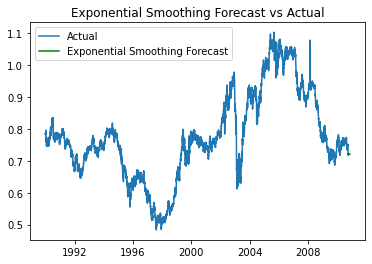

In [19]:
forecast_es = es_result.forecast(steps=30)
plt.plot(df['Ex_rate'], label='Actual')
plt.plot(forecast_es, label='Exponential Smoothing Forecast', color='green')
plt.title('Exponential Smoothing Forecast vs Actual')
plt.legend()
plt.show()


# Part 4: Evaluation and Comparison

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [21]:
# MAE, RMSE for ARIMA
mae_arima = mean_absolute_error(df['Ex_rate'][-30:], forecast)
rmse_arima = mean_squared_error(df['Ex_rate'][-30:], forecast, squared=False)

In [22]:
# MAE, RMSE for Exponential Smoothing
mae_es = mean_absolute_error(df['Ex_rate'][-30:], forecast_es)
rmse_es = mean_squared_error(df['Ex_rate'][-30:], forecast_es, squared=False)

In [23]:
print('ARIMA MAE:', mae_arima, 'RMSE:', rmse_arima)
print('Exponential Smoothing MAE:', mae_es, 'RMSE:', rmse_es)


ARIMA MAE: 0.012724006489318252 RMSE: 0.016982710912774826
Exponential Smoothing MAE: 0.012755756156713368 RMSE: 0.017005229952751045
